In [1]:
from scipy.io.arff import loadarff

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import sqrt

from modules.normalization import min_max_normalization
from modules.distance import metrics
from modules.kernels import kernels
from modules.f_score import f_macro
from modules.knn_predictions import calculate_predictions

In [2]:
data = loadarff('data/raw/dataset_191_wine.arff')
df = pd.DataFrame(data[0])
df

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,b'1',14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,b'1',13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,b'1',13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,b'1',14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,b'1',13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,b'3',13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,b'3',13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,b'3',13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,b'3',13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
df.isna().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

In [4]:
def col_to_list(df_c, mapper, name, default = 0):
    return list(map(lambda x: mapper.get(x, default), df_c[name].values.tolist()))

In [5]:
mapper_oh = {
    b'1': np.array([0., 0., 1.]),
    b'2': np.array([0., 1., 0.]),
    b'3': np.array([1., 0., 0.])
}

In [6]:
dataset_one_hot = df.copy()
dataset_one_hot['class'] = col_to_list(df, mapper_oh, 'class', default=[0.,0.,1.])
dataset_one_hot

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,"[0.0, 0.0, 1.0]",14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,"[0.0, 0.0, 1.0]",13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,"[0.0, 0.0, 1.0]",13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,"[0.0, 0.0, 1.0]",14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,"[0.0, 0.0, 1.0]",13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,"[1.0, 0.0, 0.0]",13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,"[1.0, 0.0, 0.0]",13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,"[1.0, 0.0, 0.0]",13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,"[1.0, 0.0, 0.0]",13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
ndata = min_max_normalization(dataset_one_hot, "class")
print(ndata)

[[array([0., 0., 1.]) 0.8421052631578949 0.191699604743083 ...
  0.4552845528455285 0.9706959706959707 0.5613409415121255]
 [array([0., 0., 1.]) 0.5710526315789473 0.2055335968379447 ...
  0.46341463414634154 0.7802197802197802 0.550641940085592]
 [array([0., 0., 1.]) 0.5605263157894738 0.3201581027667984 ...
  0.4471544715447155 0.6959706959706959 0.6469329529243937]
 ...
 [array([1., 0., 0.]) 0.5894736842105263 0.699604743083004 ...
  0.08943089430894308 0.10622710622710624 0.39728958630527816]
 [array([1., 0., 0.]) 0.5631578947368422 0.36561264822134387 ...
  0.0975609756097561 0.12820512820512825 0.4008559201141227]
 [array([1., 0., 0.]) 0.8157894736842107 0.6640316205533596 ...
  0.10569105691056911 0.12087912087912091 0.20114122681883023]]


In [8]:
def calculate_max_distances():
    distances_res = {"euclidean": [], "chebyshev": [], "manhattan": []}
    max_distance_res = {"euclidean": [], "chebyshev": [], "manhattan": []}

    for metric in metrics.keys():
        fun = metrics[metric]

        for row in ndata:
            local_distances = []
            max_dist = float("-inf")

            for test in ndata:
                cur_distance = fun(row[1:], test[1:])
                max_dist = cur_distance if cur_distance > max_dist else max_dist
                local_distances.append(cur_distance)

            max_distance_res[metric].append(max_dist)
            distances_res[metric].append(local_distances)

        print(metric, "calculated!")
    return distances_res, max_distance_res

In [9]:
distances, max_distance = calculate_max_distances()

euclidean calculated!
chebyshev calculated!
manhattan calculated!


In [10]:
predict_fixed, predict_var = calculate_predictions(ndata, max_distance, distances)

In [11]:
def generate_conf_matrix(metric_name, kernel_name, window, predicted):
    matrix = [[0 for _ in range(3)] for _ in range(3)]
    index = (kernel_name, metric_name, window)
    current = predicted[index]
    answers = ndata[:, 0]
    for i in range(len(answers)):
        index_pred = current[i].tolist().index(max(current[i].tolist()))
        index_actual = answers[i].tolist().index(max(answers[i].tolist()))
        matrix[index_pred][index_actual] += 1

    for i in range(3):
        matrix[i].reverse()

    matrix.reverse()

    return matrix

In [12]:
def calculate_f_score():
    f_fixed_res = {}
    f_variable_res = {}

    for kernel in kernels.keys():
        for dist in metrics.keys():
            index = (kernel, dist)
            f_fixed_res[index] = ([], [])
            f_variable_res[index] = ([], [])

            max_d = max(max_distance[dist])
            step = max_d / sqrt(len(ndata))
            window = step
            counter = 0
            while window <= max_d:
                matrix = generate_conf_matrix(dist, kernel, window, predict_fixed)
                f_fixed_res[index][0].append(window)
                counter += 1
                f_fixed_res[index][1].append(f_macro(matrix, 1))
                window += step
            print("Fixed window calculated for", kernel, dist, "!")

            for window in range(1, int(sqrt(len(ndata)))):
                matrix = generate_conf_matrix(dist, kernel, window, predict_var)
                f_variable_res[index][0].append(window)
                f_variable_res[index][1].append(f_macro(matrix, 1))
            print("Variable window calculated for", kernel, dist, "!")

    return f_fixed_res, f_variable_res

In [13]:
f_fixed, f_variable = calculate_f_score()

Fixed window calculated for uniform euclidean !
Variable window calculated for uniform euclidean !
Fixed window calculated for uniform chebyshev !
Variable window calculated for uniform chebyshev !
Fixed window calculated for uniform manhattan !
Variable window calculated for uniform manhattan !
Fixed window calculated for triangular euclidean !
Variable window calculated for triangular euclidean !
Fixed window calculated for triangular chebyshev !
Variable window calculated for triangular chebyshev !
Fixed window calculated for triangular manhattan !
Variable window calculated for triangular manhattan !
Fixed window calculated for epanechnikov euclidean !
Variable window calculated for epanechnikov euclidean !
Fixed window calculated for epanechnikov chebyshev !
Variable window calculated for epanechnikov chebyshev !
Fixed window calculated for epanechnikov manhattan !
Variable window calculated for epanechnikov manhattan !
Fixed window calculated for quartic euclidean !
Variable wind

In [14]:
def find_best_params(f_scores):
    score_eu = float("-inf")
    score_ma = float("-inf")
    score_ch = float("-inf")
    max_score = float("-inf")

    best_res = ()
    tup_eu = ()
    tup_ma = ()
    tup_ch = ()

    for params in f_scores.keys():
        current_score = max(f_scores[params][1])

        if params[1] == 'euclidean':
            if score_eu < current_score:
                score_eu = current_score
                tup_eu = params
        elif params[1] == 'manhattan':
            if score_ma < current_score:
                score_ma = current_score
                tup_ma = params
        elif params[1] == 'chebyshev':
            if score_ch < current_score:
                score_ch = current_score
                tup_ch = params

        if max_score < current_score:
            max_score = current_score
            best_res = params

    return best_res, tup_eu, tup_ma, tup_ch

Best: ('uniform', 'manhattan')
Best kernel with euclidian: uniform
Best kernel with manhattan: uniform
Best kernel with chebyshev: uniform


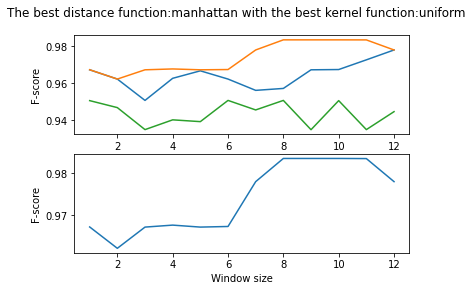

In [15]:
best, euc, man, che = find_best_params(f_variable)

print("Best:", best)
print("Best kernel with euclidian:", euc[0])
print("Best kernel with manhattan:", man[0])
print("Best kernel with chebyshev:", che[0])

record_best = f_variable[best]
ano_record1 = f_variable[euc]
ano_record2 = f_variable[man]
ano_record3 = f_variable[che]

plt.subplot(2, 1, 1)
plt.ylabel('F-score')
plt.suptitle("The best distance function:{dis} with the best kernel function:{ker}".format(dis=best[1], ker=best[0]))

plt.plot(list(ano_record1[0]), list(ano_record1[1]))
plt.plot(list(ano_record2[0]), list(ano_record2[1]))
plt.plot(list(ano_record3[0]), list(ano_record3[1]))

plt.subplot(2, 1, 2)
plt.xlabel('Window size')
plt.ylabel('F-score')
plt.plot(list(record_best[0]), list(record_best[1]))

plt.show()

best: ('uniform', 'manhattan')
best kernel with euclidian: triangular
best kernel with manhattan: uniform
best kernel with chebyshev: triangular


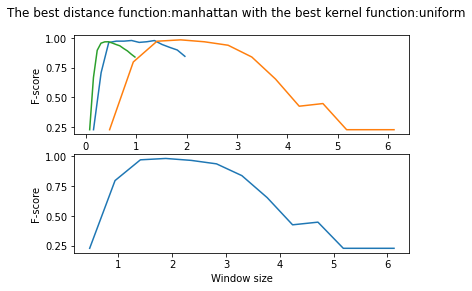

In [16]:
best, euc, man, che = find_best_params(f_fixed)

print("best:", best)
print("best kernel with euclidian:", euc[0])
print("best kernel with manhattan:", man[0])
print("best kernel with chebyshev:", che[0])

record_best = f_fixed[best]
ano_record1 = f_fixed[euc]
ano_record2 = f_fixed[man]
ano_record3 = f_fixed[che]

plt.subplot(2, 1, 1)
plt.ylabel('F-score')
plt.suptitle("The best distance function:{dis} with the best kernel function:{ker}".format(dis=best[1], ker=best[0]))

plt.plot(list(ano_record1[0]), list(ano_record1[1]))
plt.plot(list(ano_record2[0]), list(ano_record2[1]))
plt.plot(list(ano_record3[0]), list(ano_record3[1]))

plt.subplot(2, 1, 2)
plt.xlabel('Window size')
plt.ylabel('F-score')
plt.plot(list(record_best[0]), list(record_best[1]))

plt.show()